In [1]:
import igraph as ig
import numpy as np
import pandas as pd
from time import time
import math
import matplotlib.pyplot as plt
from auxiliar_projections_large import apply_projection

In [2]:
FILENAME = "TOY-GRAPH.graphml"
g = ig.read(FILENAME)
print(g.summary())
print()

user_nodes = g.vs.select(type=0)
res_nodes = g.vs.select(type=1)


IGRAPH U-WT 12 14 -- 
+ attr: frequency (v), id (v), type (v), weight (e)



In [3]:
###### ****** Projections ****** ######
user_graph = apply_projection(g, "master",
                            len(user_nodes), False) # False = Users = 0
print("Done PROJ1 - Users Projection")
edges_temp = user_graph.es()["weight"]
print(f"Peso máximo={max(edges_temp)} y mínimo={min(edges_temp)} en aristas: ")

rsrs_graph = apply_projection(g, "master",
                            len(user_nodes), True) # True = Resources = 1
print("\nDone PROJ2 - Resources Projection")
edges_temp = rsrs_graph.es()["weight"]
print(f"Peso máximo={max(edges_temp)} y mínimo={min(edges_temp)} en aristas: ")
print()

Done PROJ1 - Users Projection
Peso máximo=1.0 y mínimo=0.5 en aristas: 

Done PROJ2 - Resources Projection
Peso máximo=0.125 y mínimo=0.03125 en aristas: 



<AxesSubplot: >

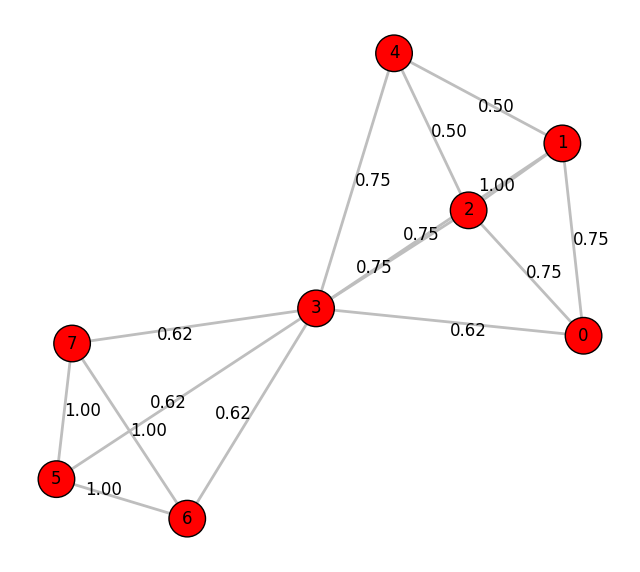

In [4]:
# Etiqueta para los nodos: Usaremos el índice del nodo
g = user_graph
# Puedes usar g.vs["name"] si prefieres mostrar los nombres asignados
g.vs["label"] = [str(i) for i in range(g.vcount())]

# Etiquetas para las aristas: Usaremos el peso de las aristas
# Formatear el peso para que no tenga demasiados decimales
g.es["label"] = [f"{w:.2f}" for w in g.es["weight"]]

# 2. Definir el layout del grafo
# El layout determina la posición de los nodos en el dibujo.
# Hay varios algoritmos disponibles:
# - 'auto': igraph intenta elegir el mejor.
# - 'kk': Kamada-Kawai (bueno para grafos con estructura).
# - 'fr': Fruchterman-Reingold (bueno para grafos generales).
# - 'circle': Nodos en un círculo.
# - 'grid': Nodos en una cuadrícula.
# - 'tree': Para árboles.
layout = g.layout("fr") # Usando el algoritmo Fruchterman-Reingold

# 3. Graficar el grafo
# Usamos el método plot de igraph, que internamente usa matplotlib.
fig, ax = plt.subplots(figsize=(8, 8)) # Crear una figura y ejes para mayor control

ig.plot(
    g,
    target=ax, # Especificar los ejes de matplotlib para dibujar
    layout=layout,
    vertex_label=g.vs["label"], # Mostrar el índice del nodo como etiqueta
    edge_label=g.es["label"],   # Mostrar el peso de la arista como etiqueta
    edge_color="gray",
    bbox=(600, 600), # Tamaño del bounding box para el dibujo
    margin=20, # Margen alrededor del grafo
    autocurve=True # Curvar las aristas si hay múltiples entre los mismos nodos
)
